# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
# Your work here.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [29]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


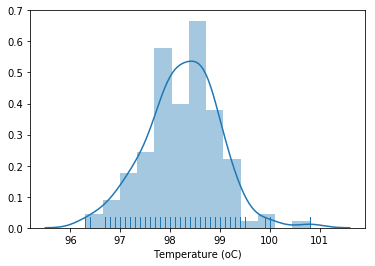

In [76]:
ax = sns.distplot(df[['temperature']], rug=True, axlabel='Temperature (oC)')

In [84]:
print("Population temperature: mean = %f | std = %f" % (df['temperature'].mean(), df['temperature'].std())) 

Population temperature: mean = 98.249231 | std = 0.733183


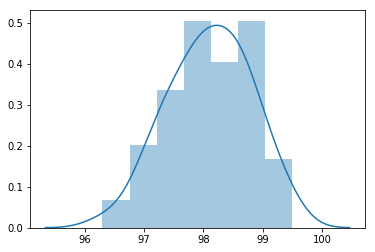

In [35]:
temp_male = df.loc[df['gender'] == 'M']
ax = sns.distplot(temp_male[['temperature']])

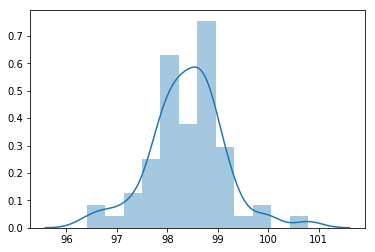

In [36]:
temp_female = df.loc[df['gender'] == 'F']
ax = sns.distplot(temp_female[['temperature']])

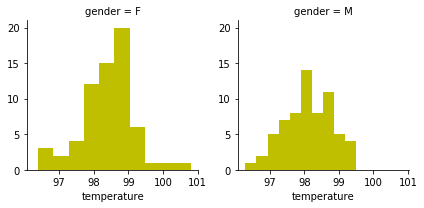

In [50]:
grid = sns.FacetGrid(df, col="gender")
grid.map(plt.hist, "temperature", color="y")

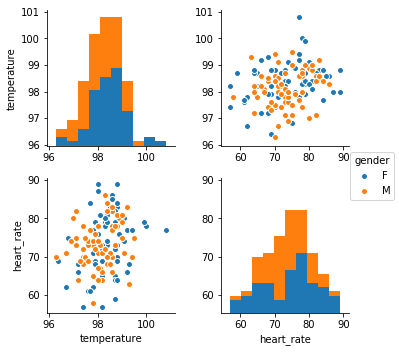

In [43]:
sns.pairplot(df, hue='gender', size=2.5)

In [53]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [63]:
mean_temp = df['temperature'].mean()
sigma = df['temperature'].std(ddof=1)

conf_int_a = stats.norm.interval(0.68, loc=mean_temp, scale=sigma)

## 3. Is the true population mean really 98.6 degrees F?

**No**. The population mean is **98.24 degrees F** (male population = **98.10** | female population = **98.39**).

In [117]:
print("Population temperature mean = %f degrees F" % (df['temperature'].mean()))
print("(male population = %f degrees F | female population = %f degrees F)" % \
      (df['temperature'].loc[df['gender'] == 'M'].mean(),\
       df['temperature'].loc[df['gender'] == 'F'].mean()))

Population temperature mean = 98.249231 degrees F
(male population = 98.104615 degrees F | female population = 98.393846 degrees F)


### . Would you use a one-sample or two-sample test? Why?

**One-sample teste**, once we want to compare one group to a hypothetical value [1].

### . In this situation, is it appropriate to use the  *t*  or  *z*  statistic?

It is appropriate to **use *z* statistic**. Among other reasons [2]:
* Sample > 30 (390 records)
* We want to compare the mean of a population (98.2 degrees F) versus a standard (98.6 degrees  F)
* We know the standard deviation (std = 0.73)

### . Now try using the other test. How is the result be different? Why?

In order to apply the *t* statistic, we will use a sample with 29 records randomly extracted from original dataframe. 

In [124]:
df_sample29 = df.sample(n=29)

In [125]:
df_sample29.describe()

,temperature,heart_rate
count,29.000000,29.000000
mean,98.420690,72.379310
std,0.537441,7.857725
min,97.300000,58.000000
25%,98.000000,67.000000
50%,98.400000,71.000000
75%,98.700000,78.000000
max,99.900000,89.000000


In [128]:
x = (98.4 - 98.6)/(0.53/(29**(1/2)))

## References:

[1] *"What Statistical Analysis Should I Use? Statistical Analyses Using STATA"*. Last access: 12/25/2017 - Link: [https://stats.idre.ucla.edu/stata/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-stata/](https://stats.idre.ucla.edu/stata/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-stata/)

[2] *"T-Score vs. Z-Score: What’s the Difference?"*. Last access: 12/26/2017 - Link:  [http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/](http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/)

[x] *"Central limit theorem"*, Khan Acadeny. Last access: 12/26/2017. Link: [https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean](https://www.khanacademy.org/math/ap-statistics/sampling-distribution-ap/sampling-distribution-mean/v/sampling-distribution-of-the-sample-mean)

[y] **Important**: [https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/hypothesis-testing-and-p-values}(https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/tests-about-population-mean/v/hypothesis-testing-and-p-values)]